In [7]:
# =======================================
# Author: Hung Tran-Nam
# Email: namhung34.info@gmail.com
# Repo: https://github.com/hungtrannam/probclust
# =======================================
# File: vis_dist.py
# Description: Visualize distances between probability distributions
# =======================================

In [8]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [9]:
import numpy as np
from scipy.stats import norm
from utils import dist
import matplotlib.pyplot as plt
from utils.vis import temp 

In [10]:


def U_cluster1(D2, m=2.0, omega=(0.5, 0.5), delta=0.0, Dstar=(0.5, 0.5)):
    """Membership của cluster 1 theo công thức rút gọn."""
    p = 1.0 / (m - 1.0)
    eps = 1e-9

    num1 = (1 - delta * Dstar[0]) * omega[0]
    num2 = (1 - delta * Dstar[1]) * omega[1]

    core1 = np.clip(D2 - omega[0] * delta * Dstar[0], eps, None)
    core2 = np.clip((1 - D2) - omega[1] * delta * Dstar[1], eps, None)

    t1 = (num1 / core1) ** p
    t2 = (num2 / core2) ** p
    return t1 / (t1 + t2)



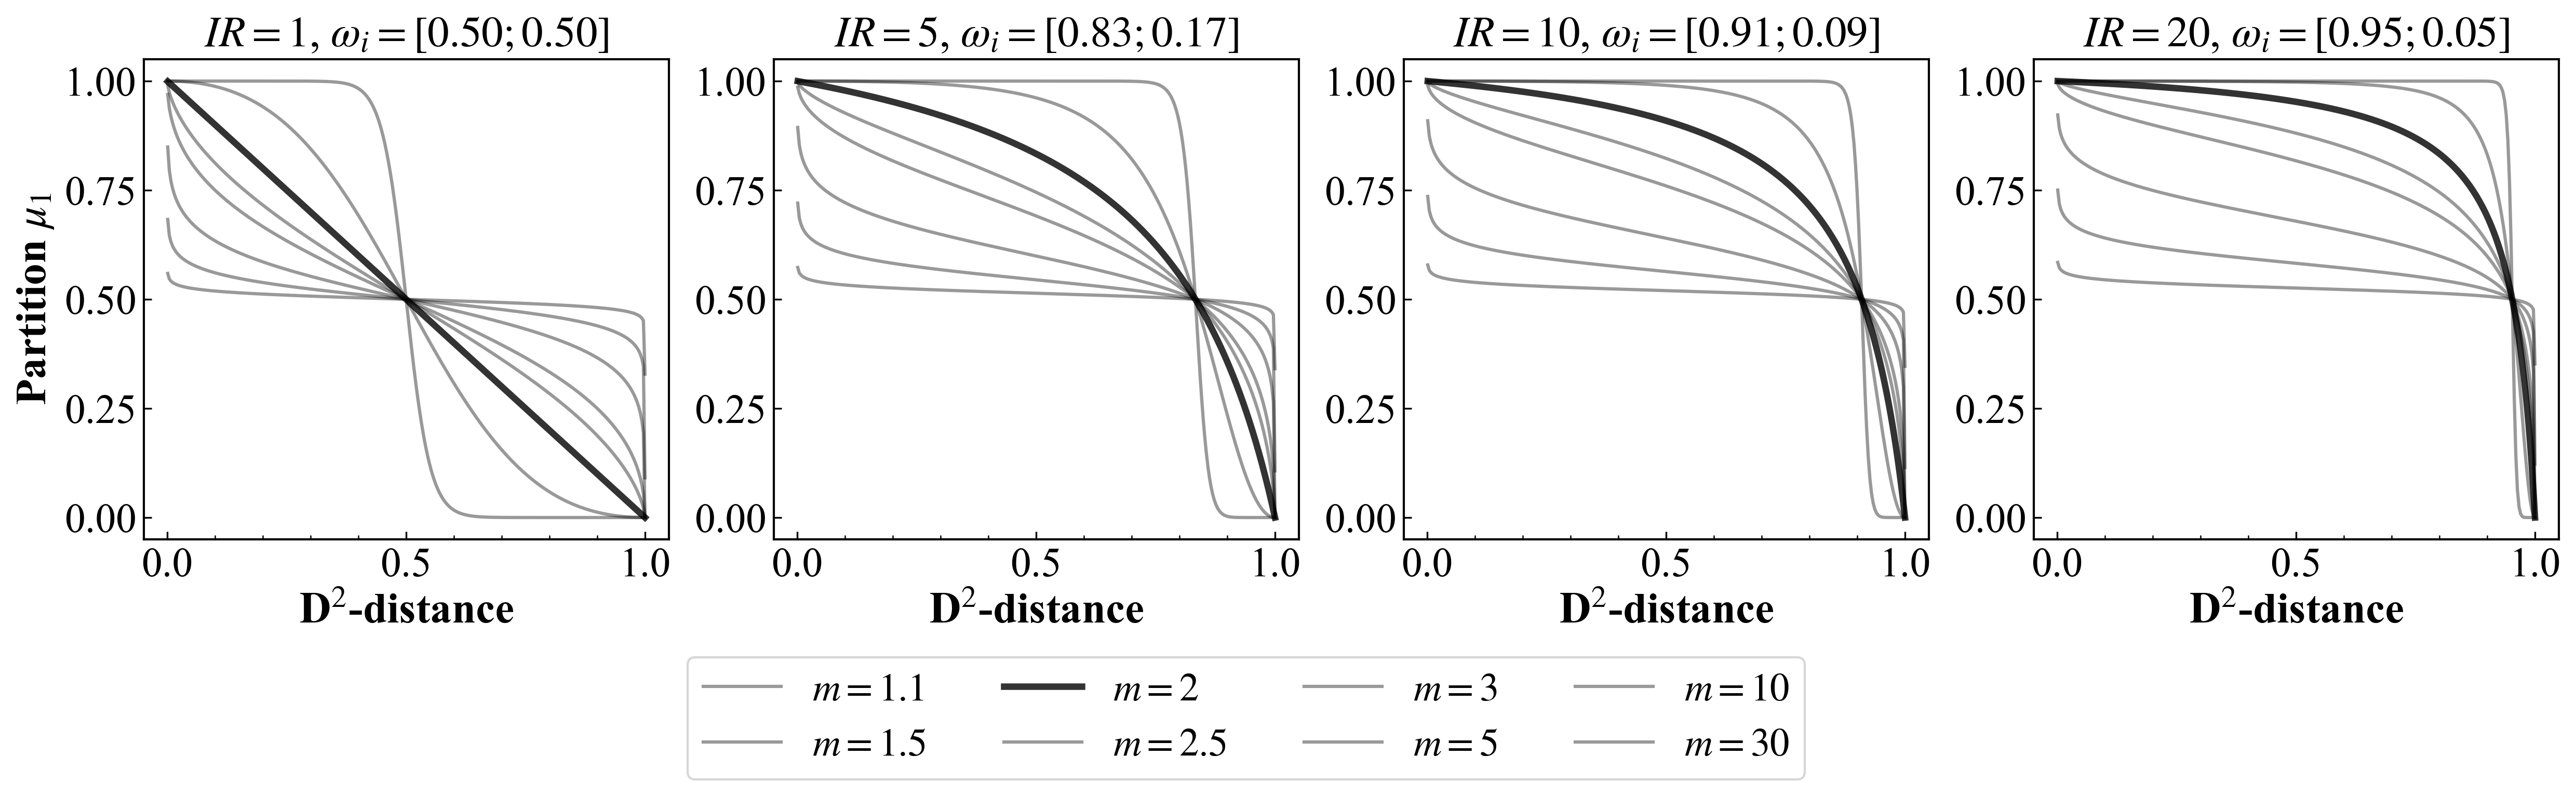

In [11]:

# ====== Các giá trị IR và m ======
IR_values = [1, 5, 10, 20]
# omegas = [(0.001, 0.001 )for IR in IR_values]
omegas = [(IR/(IR+1), 1/(IR+1)) for IR in IR_values]
m_values = [1.1, 1.5, 2, 2.5, 3, 5, 10, 30]

D2 = np.linspace(0.001, 1, 300)

# Vẽ 4 frame ứng với IR khác nhau
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
temp(20)
axes = axes.flatten()

for idx, (IR, omega) in enumerate(zip(IR_values, omegas)):
    ax = axes[idx]
    for m in m_values:
        U1 = U_cluster1(D2, m=m, omega=omega, delta=0.0)
        ax.plot(D2, U1, label=fr"$m={m}$",color='black', lw=3 if m==2 else 1.5, alpha=0.8 if m==2 else 0.4)
    ax.set_title(fr"$IR={IR}$, $\omega_i=[{omega[0]:.2f}; {omega[1]:.2f}]$")
    ax.set_xlabel(r"$\mathbf{D}^2$-distance")
    ax.grid(False)
    if idx == 0:
        ax.set_ylabel(r"Partition $\mu_1$")
    if idx == len(IR_values) - 1:
        	plt.legend(
			bbox_to_anchor=(-1.5, -.5),
			loc='lower center', 
			ncol=4,
			borderaxespad=0.
		)
plt.savefig("partition_m.pdf", dpi=300)
plt.show()

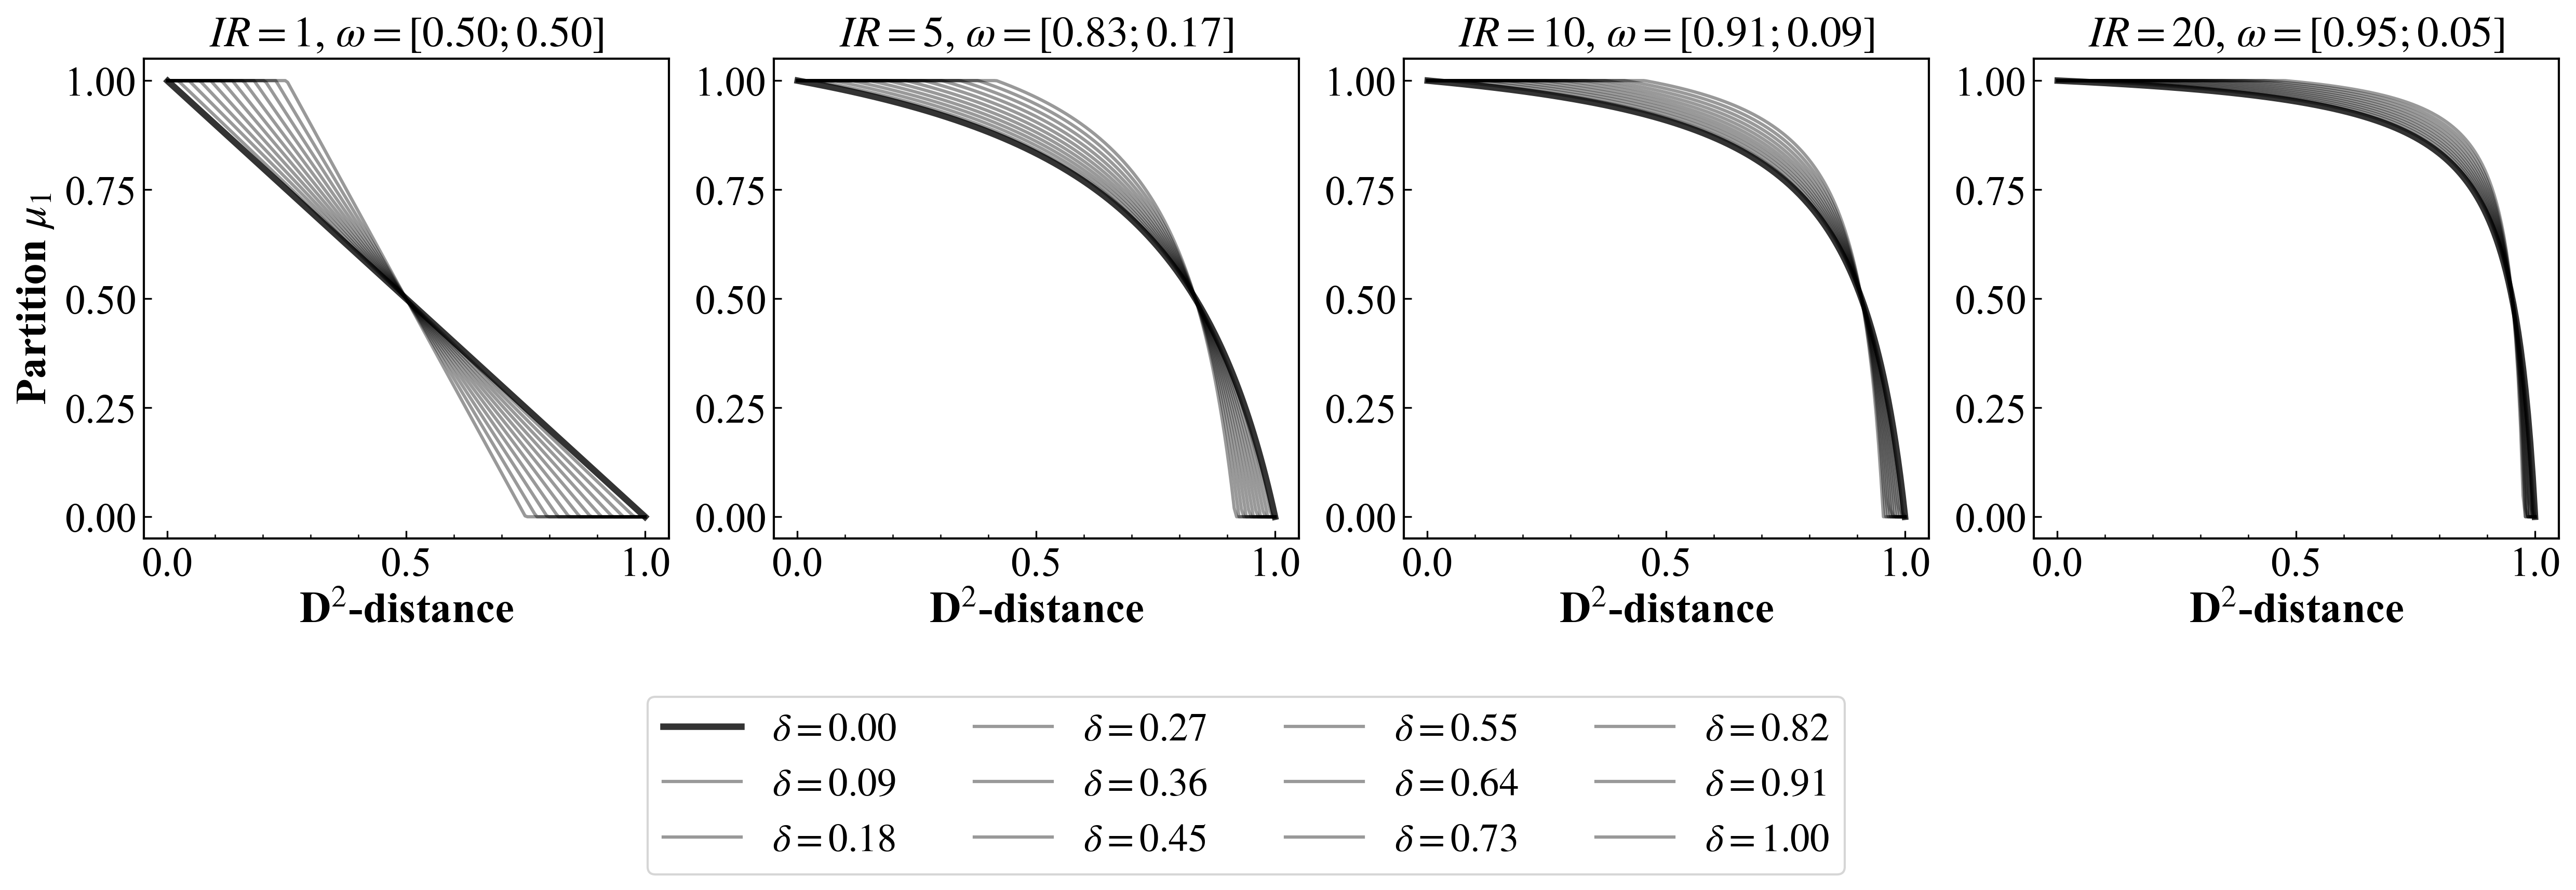

In [12]:


# ==== Thông số ====
D2 = np.linspace(0.001, 1, 200)
IR_values = [1, 5, 10, 20]
delta_values = np.linspace(0, 1, 12)
m = 2.0

# ==== Vẽ 4 frame ứng với IR khác nhau ====
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()

for idx, IR in enumerate(IR_values):
    omega = (IR/(IR+1), 1/(IR+1))
    ax = axes[idx]
    for d in delta_values:
        U1 = U_cluster1(D2, m=m, omega=omega, delta=d)
        ax.plot(D2, U1, label=fr"$\delta={d:.2f}$", color='black', lw=3 if d==0 else 1.5, alpha=0.8 if d==0 else 0.4)
    ax.set_title(fr"$IR={IR}$, $\omega=[{omega[0]:.2f}; {omega[1]:.2f}]$")
    ax.set_xlabel(r"$\mathbf{D}^2$-distance")
    if idx == 0:
        ax.set_ylabel(r"Partition $\mu_1$")
    if idx == len(IR_values)-1:
        plt.legend(
			bbox_to_anchor=(-1.5, -.7),
			loc='lower center', 
			ncol=4,
			borderaxespad=0.
		)
plt.savefig("partition_delta.pdf", dpi=300)
plt.show()
